In [13]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
import os
import math
import matplotlib.pyplot as py
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
class adsorption_dataset(Dataset):
    def __init__(self):
        self.xy=np.loadtxt('C:\\Users\\mohit\\Desktop\\ANN\\Adsorption_Data.csv',delimiter=',',dtype=np.float64,skiprows=1)
        self.data=torch.from_numpy(self.xy[0:,:5])
        self.target=torch.from_numpy(self.xy[0:,[5]])
    def __len__(self):
        return len(self.target)
    def __getitem__(self,index):
        return self.data[index],self.target[index]

In [45]:
dataset = adsorption_dataset()
x=dataset.data
y=dataset.target
d=np.append(np.array(x),np.array(y),axis=1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1234)
x_train=x_train.float()
print(d)

[[1.280e+01 1.160e+00 3.800e-01 7.510e+00 8.750e+00 1.440e-01]
 [6.500e+00 5.700e-01 4.000e-02 3.340e+00 3.690e+00 3.340e-01]
 [8.700e+00 5.400e-01 2.100e-01 4.098e+01 3.337e+01 4.520e-01]
 [3.500e+00 3.500e-01 1.200e-01 2.205e+01 7.550e+00 3.330e-01]
 [7.200e+00 7.100e-01 3.000e-02 3.160e+00 1.970e+00 3.830e-01]
 [9.700e+00 9.800e-01 3.400e-01 5.888e+01 5.800e+01 3.660e-01]
 [1.090e+01 7.400e-01 3.200e-01 6.070e+00 4.600e+01 5.440e-01]
 [2.500e+00 3.200e-01 1.700e-01 2.801e+01 2.200e+01 4.360e-01]
 [5.860e+01 2.100e+00 3.800e-01 3.800e-01 3.803e+01 1.160e+00]
 [6.910e+01 1.770e+00 8.600e-01 5.300e-01 1.110e+02 2.400e+00]
 [4.190e+01 1.370e+00 9.300e-01 4.050e+00 1.380e+02 1.900e+00]
 [6.200e+01 1.760e+00 9.300e-01 6.270e+00 1.280e+02 1.200e+00]
 [4.470e+01 1.380e+00 1.060e+00 1.577e+01 9.600e+01 3.260e+00]
 [6.850e+01 1.860e+00 1.270e+00 3.800e-01 1.060e+02 2.800e+00]
 [4.920e+01 2.590e+00 5.600e-01 5.270e+00 7.090e+02 5.690e+00]
 [7.610e+01 4.100e+00 2.400e-01 4.520e+00 2.400e+00 6.0

Text(0, 0.5, 'adsorption capacity')

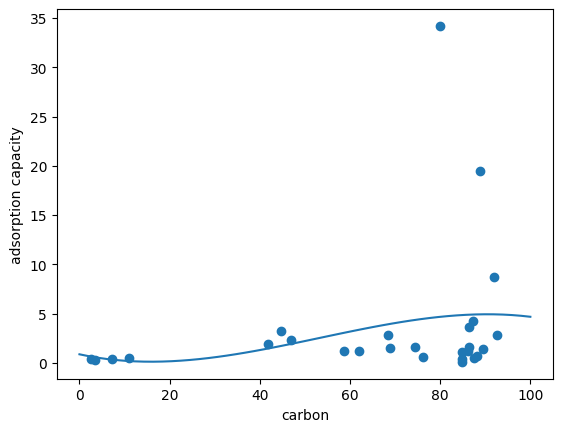

In [5]:
x=x_train[:,0].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,100,50)
py.scatter(x_train[:,[0]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('carbon')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

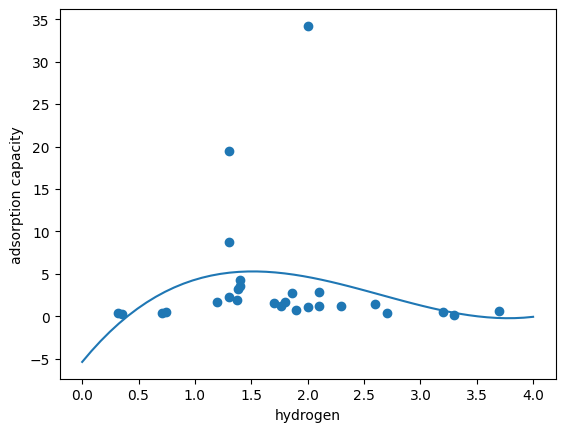

In [6]:
x=x_train[:,1].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,4,50)
py.scatter(x_train[:,[1]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('hydrogen')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

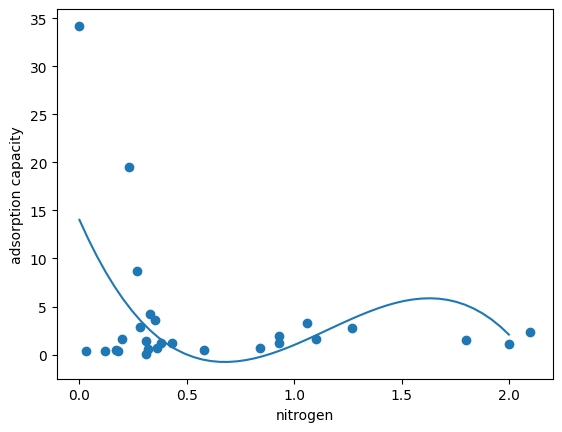

In [7]:
x=x_train[:,2].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,2,50)
py.scatter(x_train[:,[2]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('nitrogen')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

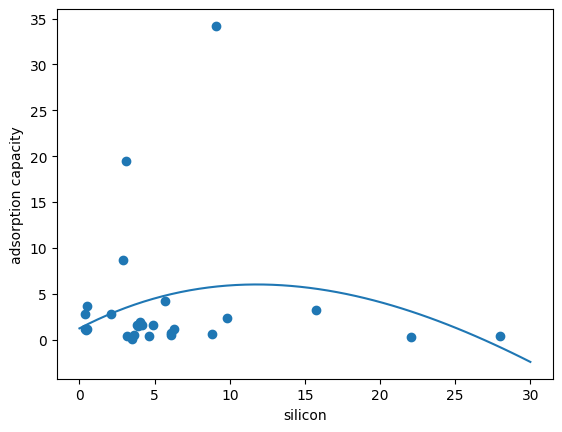

In [8]:
x=x_train[:,3].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,30,50)
py.scatter(x_train[:,[3]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('silicon')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

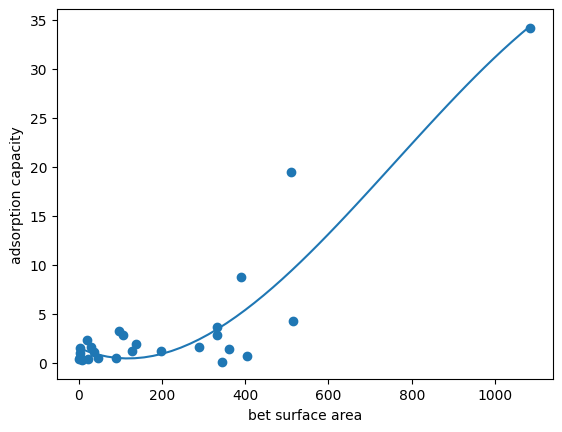

In [9]:
x=x_train[:,4].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(2.5,1085,50)
py.scatter(x_train[:,[4]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('bet surface area')
py.ylabel('adsorption capacity')

[[ 1.          0.66152873  0.13221853 -0.58004135  0.44058428  0.27062367]
 [ 0.66152873  1.          0.0141564  -0.38067153  0.1637085   0.0013669 ]
 [ 0.13221853  0.0141564   1.         -0.157786   -0.31626332 -0.18656245]
 [-0.58004135 -0.38067153 -0.157786    1.         -0.17907491 -0.09248279]
 [ 0.44058428  0.1637085  -0.31626332 -0.17907491  1.          0.78741392]
 [ 0.27062367  0.0013669  -0.18656245 -0.09248279  0.78741392  1.        ]]


Text(0.5, 1.0, 'Heat Map')

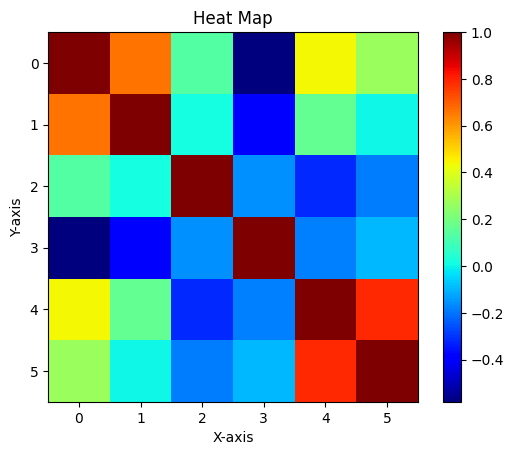

In [46]:
m=np.corrcoef(d,rowvar=False)
print(m)
py.imshow(m,cmap='jet')
py.colorbar()
py.xlabel('X-axis')
py.ylabel('Y-axis')
py.title('Heat Map')

In [375]:
class model(nn.Module):
    def __init__(self,input_features=5,hidden1=27,hidden2=9,hidden3=3,output=1):
        super().__init__()
        self.fc1=nn.Linear(input_features,hidden1)
        self.fc2=nn.Linear(hidden1,hidden2)
        self.fc3=nn.Linear(hidden2,hidden3)
        self.out=nn.Linear(hidden3,output)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.out(x)
        return x

In [376]:
torch.manual_seed(27)
model=model()

In [377]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.1)


In [378]:
epochs=1000
losses=[]
for epoch in range(epochs) :
    y_pred=model.forward(x_train)
    loss=loss_function(y_pred.float(),y_train.float())
    if(epoch%50==0):
        print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss=loss.detach().cpu().numpy()
    losses.append(loss)

tensor(78.3629, grad_fn=<MseLossBackward0>)
tensor(7.2740, grad_fn=<MseLossBackward0>)
tensor(5.0781, grad_fn=<MseLossBackward0>)
tensor(5.3998, grad_fn=<MseLossBackward0>)
tensor(5.1402, grad_fn=<MseLossBackward0>)
tensor(4.8491, grad_fn=<MseLossBackward0>)
tensor(4.3904, grad_fn=<MseLossBackward0>)
tensor(3.6048, grad_fn=<MseLossBackward0>)
tensor(8.1231, grad_fn=<MseLossBackward0>)
tensor(3.2174, grad_fn=<MseLossBackward0>)
tensor(2.8842, grad_fn=<MseLossBackward0>)
tensor(2.8297, grad_fn=<MseLossBackward0>)
tensor(2.7690, grad_fn=<MseLossBackward0>)
tensor(2.6990, grad_fn=<MseLossBackward0>)
tensor(2.6073, grad_fn=<MseLossBackward0>)
tensor(2.6810, grad_fn=<MseLossBackward0>)
tensor(2.3765, grad_fn=<MseLossBackward0>)
tensor(4.6790, grad_fn=<MseLossBackward0>)
tensor(2.3053, grad_fn=<MseLossBackward0>)
tensor(2.1463, grad_fn=<MseLossBackward0>)


2.0171394


Text(0.5, 0, 'iter')

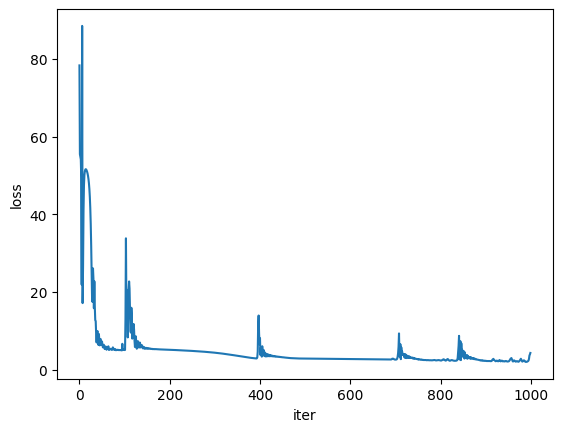

In [379]:
%matplotlib inline
print(min(losses))
py.plot(range(1000),losses)
py.ylabel('loss')
py.xlabel('iter')

In [380]:

with torch.no_grad():
    y_pred=model(x_test.float())
    y_prediction=y_pred

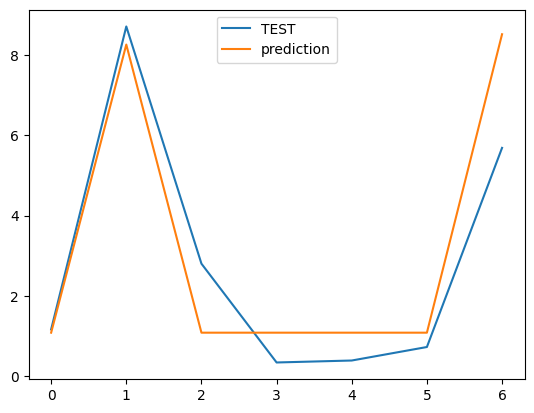

In [381]:
py.plot(y_test,label='TEST')
py.plot(y_prediction,label='prediction')
py.legend()
py.show()

In [382]:
from sklearn.metrics import r2_score
r2_score(y_prediction,y_test)

0.8382605151101921